In [1]:
import cv2
from matplotlib import pyplot

def plot_cv2(image):
    pyplot.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    )

In [2]:
image = cv2.imread("lab1.jpg")
print(type(image), '\n')
print(f"Wymiary obrazu: {image.shape}")

<class 'numpy.ndarray'> 

Wymiary obrazu: (853, 1280, 3)


In [3]:
new_image = image.copy()

In [4]:
# Zmiana maksymalnych wymiarów obrazu w matplotlib, 
# proporcje zostaną zachowane
pyplot.rcParams['figure.figsize'] = [16, 8]

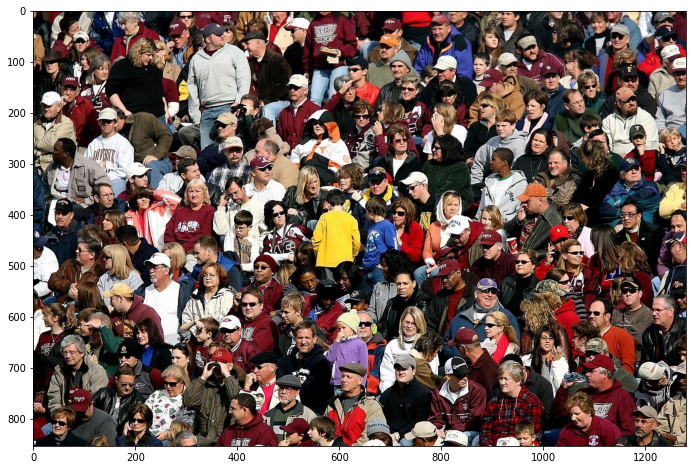

In [5]:
plot_cv2(image)

#### <font color='red'>Uwaga: OpenCV stosuje domyślnie format BGR!</font>

In [6]:
# Podejrzenie koloru indywidualnego piksela:
(B, G, R) = image[70, 10]
print(R, G, B)


192 145 101


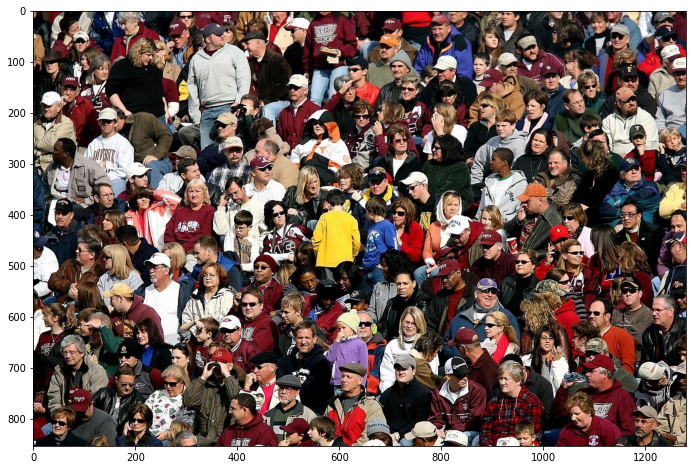

In [7]:
# Konwersja systemu barw
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
pyplot.imshow(rgb_image)

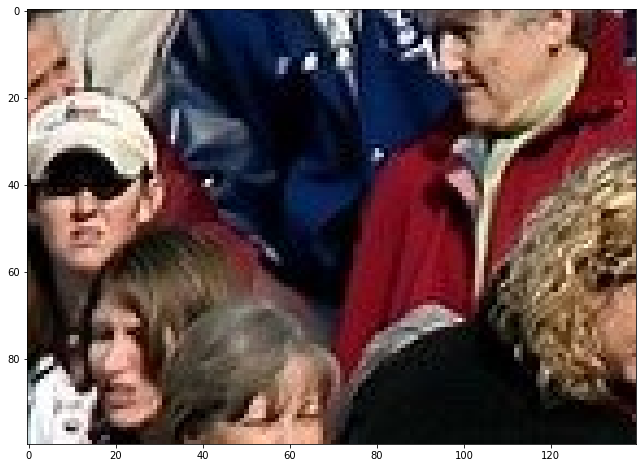

In [8]:
# Wycięcie   fragmentu   obrazu   
plot_cv2(image[20:120,80:220])

---

### d) Wytnij z obrazu jedną z twarzy


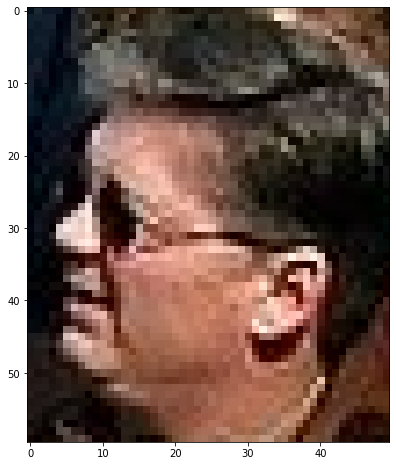

In [9]:
face = image[440:500,80:130]
plot_cv2(face)

---

### e) Zmniejsz obraz o 50% - obliczając automatycznie `new_x`,`new_y` tak by zachować proporcję wymiarów obrazu

In [10]:
new_x, new_y = int(image.shape[1]/2), int(image.shape[0]/2)
print(new_x, new_y)
# najpierw y, potem x !!!

640 426


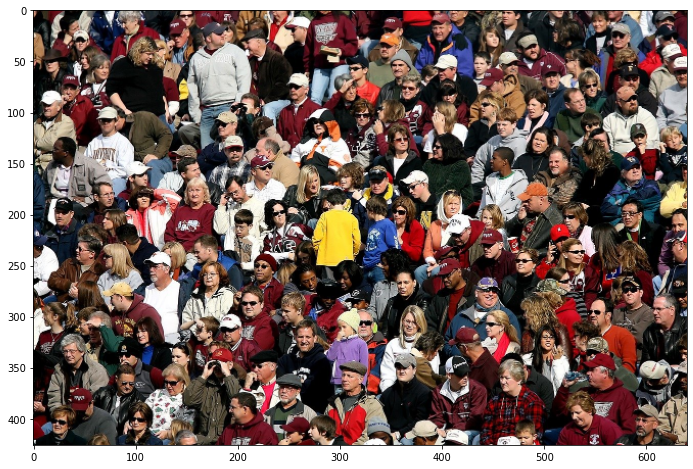

In [11]:
resized = cv2.resize(image, (new_x, new_y))
plot_cv2(resized)

In [12]:
# h1 = abs( cos(phi) h ) + abs( sin(phi) w )
# w1 = abs( cos(phi) w ) + abs( sin(phi) h )

---

### f) Obróć pierwotny obraz o 30 stopni zgodnie przeciwnie do ruchu wskazówek zegara. Spróbuj znaleźć rozwiązanie dla problemu wychodzenia obróconego obrazu poza okno pierwotnego obrazu

[[ 8.66025404e-01  5.00000000e-01 -2.56258422e-01]
 [-5.00000000e-01  8.66025404e-01  6.40073178e+02]]


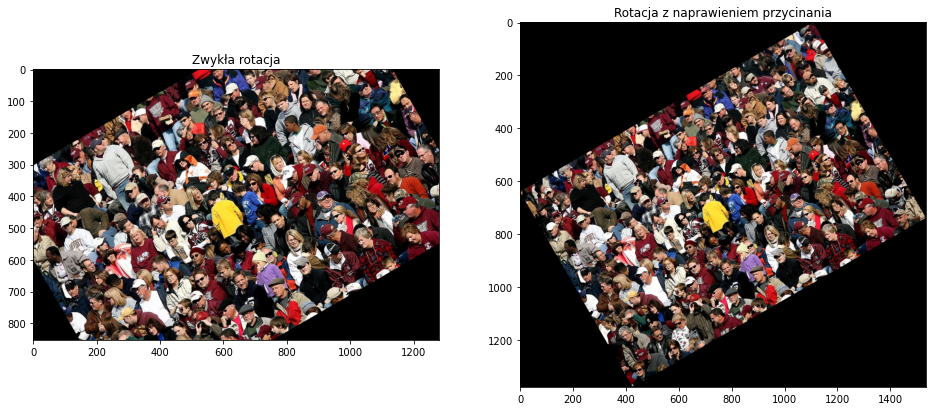

In [13]:
# import math
# import numpy as np

f = pyplot.figure()

center = (
    int(image.shape[1]/2), int(image.shape[0]/2)
)
angle = 30
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1)

rotated_unfixed = cv2.warpAffine(
    src=image,
    M=rotation_matrix, 
    dsize=(image.shape[1], image.shape[0])
)

ax = pyplot.subplot(1, 2, 1)
ax.set_title("Zwykła rotacja")
plot_cv2(rotated_unfixed)

###################################################################################

new_height = abs(image.shape[0] * rotation_matrix[0, 0]) \
    + abs(image.shape[1] * rotation_matrix[0, 1])
new_width = abs(image.shape[1] * rotation_matrix[0, 0]) \
    + abs(image.shape[0] * rotation_matrix[0, 1])

new_height, new_width = int(new_height), int(new_width) 

rotation_matrix[0, 2] += int(new_width/2 - center[0])
rotation_matrix[1, 2] += int(new_height/2 - center[1])
print(rotation_matrix)
rotated_fixed = cv2.warpAffine(
    src=image,
    M=rotation_matrix, 
    dsize=(new_width, new_height)
)
ax = pyplot.subplot(1, 2, 2)
ax.set_title("Rotacja z naprawieniem przycinania")
plot_cv2(rotated_fixed)

---

### g) Oznacz jedną z twarzy na pierwotnym obrazie czerwonym prostokątem i podpisz poniżej imieniem i nazwiskiem

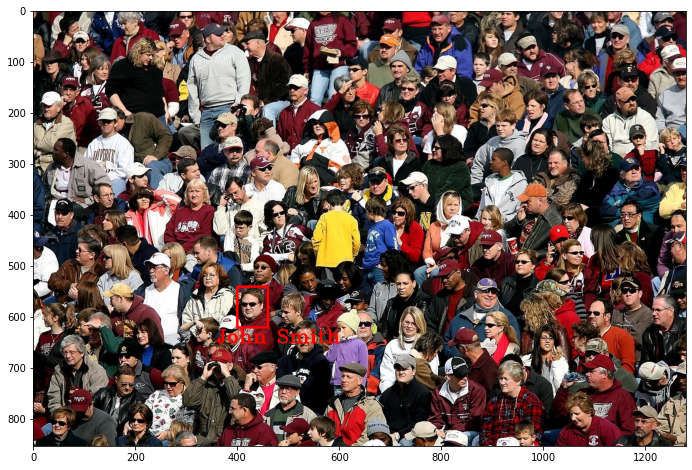

In [14]:
frame_start_point = (400, 540)
frame_end_point = (460, 620)
frame_color = (0, 0, 255)
image_with_frame = cv2.rectangle(
    image.copy(), 
    frame_start_point, 
    frame_end_point, 
    color = frame_color, 
    thickness = 4
)
image_with_text = cv2.putText(
    image_with_frame.copy(),
    "John Smith",
    org=(360, 650), 
    fontFace = 100,
    fontScale = 1.2,
    color = frame_color,
    thickness = 2
)
plot_cv2(image_with_text)

---

### h) Zapisz obraz z punktu g

In [15]:
cv2.imwrite(filename='lab1_g.jpg', img=image_with_text)

True

---

### Proszę policzyć łączną liczbę kolorów użytych w obrazie

Do zagadnienia można podejść dwojako:
1. z użyciem `set` i obliczeniem tylko łącznej liczby kolorów
2. z użyciem `dict` i zliczeniem wystąpień danego koloru (potrzebne, gdy chcemy uzyskać histogram)

In [16]:
height, width = image.shape[0], image.shape[1]
colors_set = set()   # 1. sposob
colors_dict = dict() # 2. sposób
for h in range(height):
    for w in range(width):
        colors_set |= set( ( tuple(image[h,w]), ) ) #suma zbiorow
        color = tuple(image[h,w])
        if color in colors_dict:
            colors_dict[color] += 1
        else:
            colors_dict[color] = 1
        
print(len(colors_set), len(colors_dict))

262240 262240


In [17]:
# labels = [str(x) for x in colors_dict.keys()]
# labels
# pyplot.bar( 
#     labels, 
#     colors_dict.values(),
#     color = 'g'
# )

### Proszę zapisać obraz w skali szarości

True

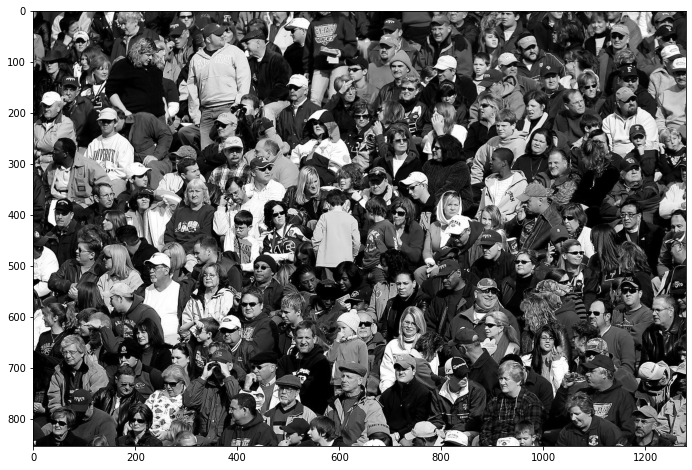

In [18]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_cv2(gray_img)
cv2.imwrite(filename='lab1_gray.jpg', img=gray_img)